In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0080.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0262.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-1749.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0108.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-1680.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-1702.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0379.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-1420.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0037.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-1522.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0819.jpg
/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset/pituitary/pi-0831.jpg
/kaggle/input/brain-tumor-mr

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

In [22]:
# Define paths
data_dir = '/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset'  # Replace with your dataset path
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']  # Class names


In [23]:

# Load images and labels
images = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
        img_array = tf.keras.preprocessing.image.img_to_array(img_array)
        images.append(img_array)
        labels.append(categories.index(category))  # Assign label as index

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display image dimensions
print(f"Total number of images: {len(images)}")
print(f"Image dimensions: {images[0].shape}")  # (height, width, channels)

Total number of images: 7153
Image dimensions: (150, 150, 3)


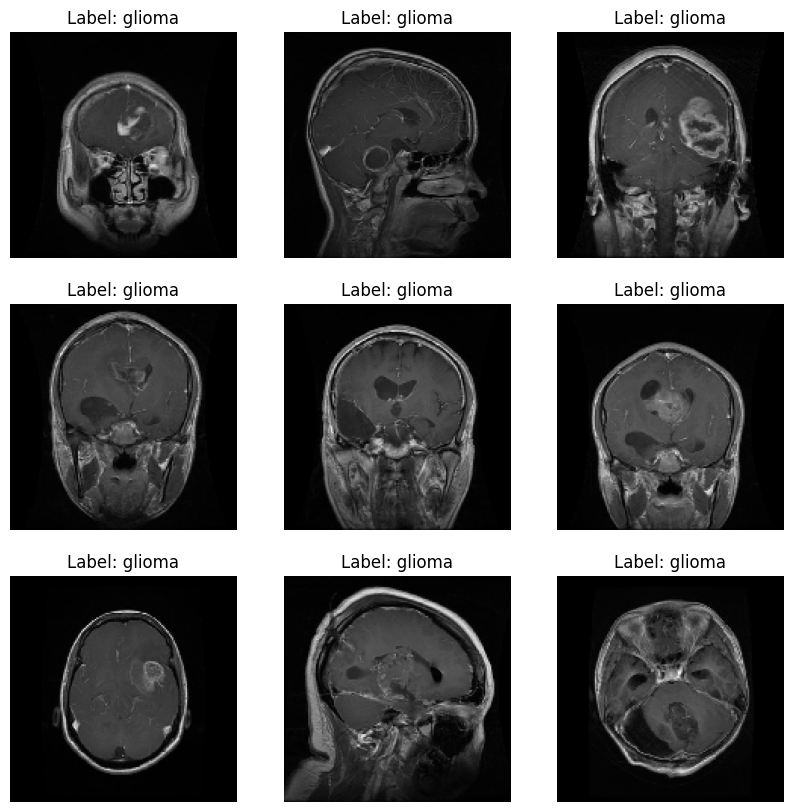

In [39]:
# Function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {categories[np.argmax(labels[i])]}')
        plt.axis('off')
    plt.show()

plot_images(images, labels, )

In [24]:
# Normalize the images
images = images / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display dimensions after splitting
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4577, 150, 150, 3)
Validation data shape: (1145, 150, 150, 3)
Testing data shape: (1431, 150, 150, 3)


In [25]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [26]:
# Build the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (4 classes)
model.add(Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 150ms/step - accuracy: 0.3922 - loss: 1.3028 - val_accuracy: 0.6148 - val_loss: 0.9073
Epoch 2/50
  1/143 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5312 - loss: 0.9602

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.9602 - val_accuracy: 0.6087 - val_loss: 0.9116
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.6223 - loss: 0.9047 - val_accuracy: 0.5083 - val_loss: 1.1454
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.8154 - val_accuracy: 0.5197 - val_loss: 1.1365
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.6795 - loss: 0.7728 - val_accuracy: 0.4969 - val_loss: 1.2456
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.7927 - val_accuracy: 0.4786 - val_loss: 1.3170
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.6994 - loss: 0.7463 - val_accuracy: 0.6376 - val_loss: 0.8762
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.6154 - val_accuracy: 0.6306 - val_loss: 0.8884
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.7196 - loss: 0.6832 - val_accuracy: 0

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7108 - loss: 0.8240
Test Accuracy: 0.72
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


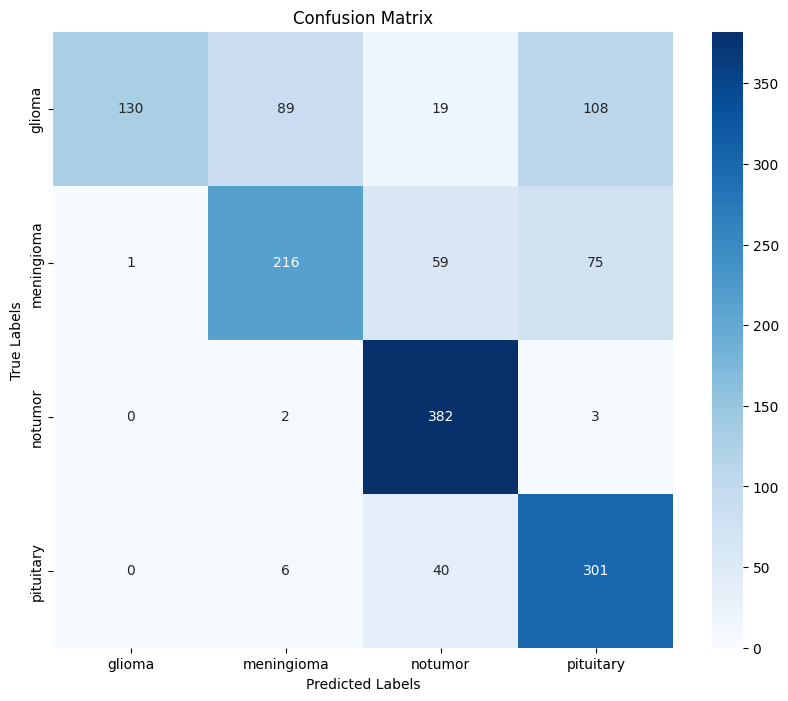

Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.38      0.55       346
  meningioma       0.69      0.62      0.65       351
     notumor       0.76      0.99      0.86       387
   pituitary       0.62      0.87      0.72       347

    accuracy                           0.72      1431
   macro avg       0.77      0.71      0.69      1431
weighted avg       0.77      0.72      0.70      1431



In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion Matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, 
            yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

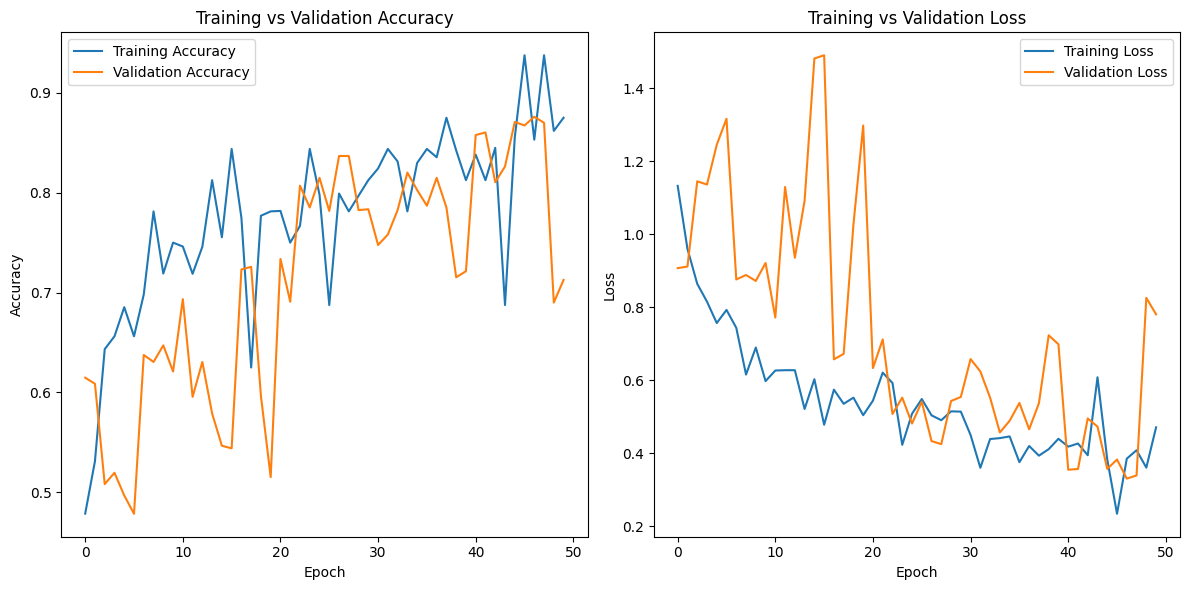

In [33]:


# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Save the model
model.save('/kaggle/working/brain_tumor_multi_class_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


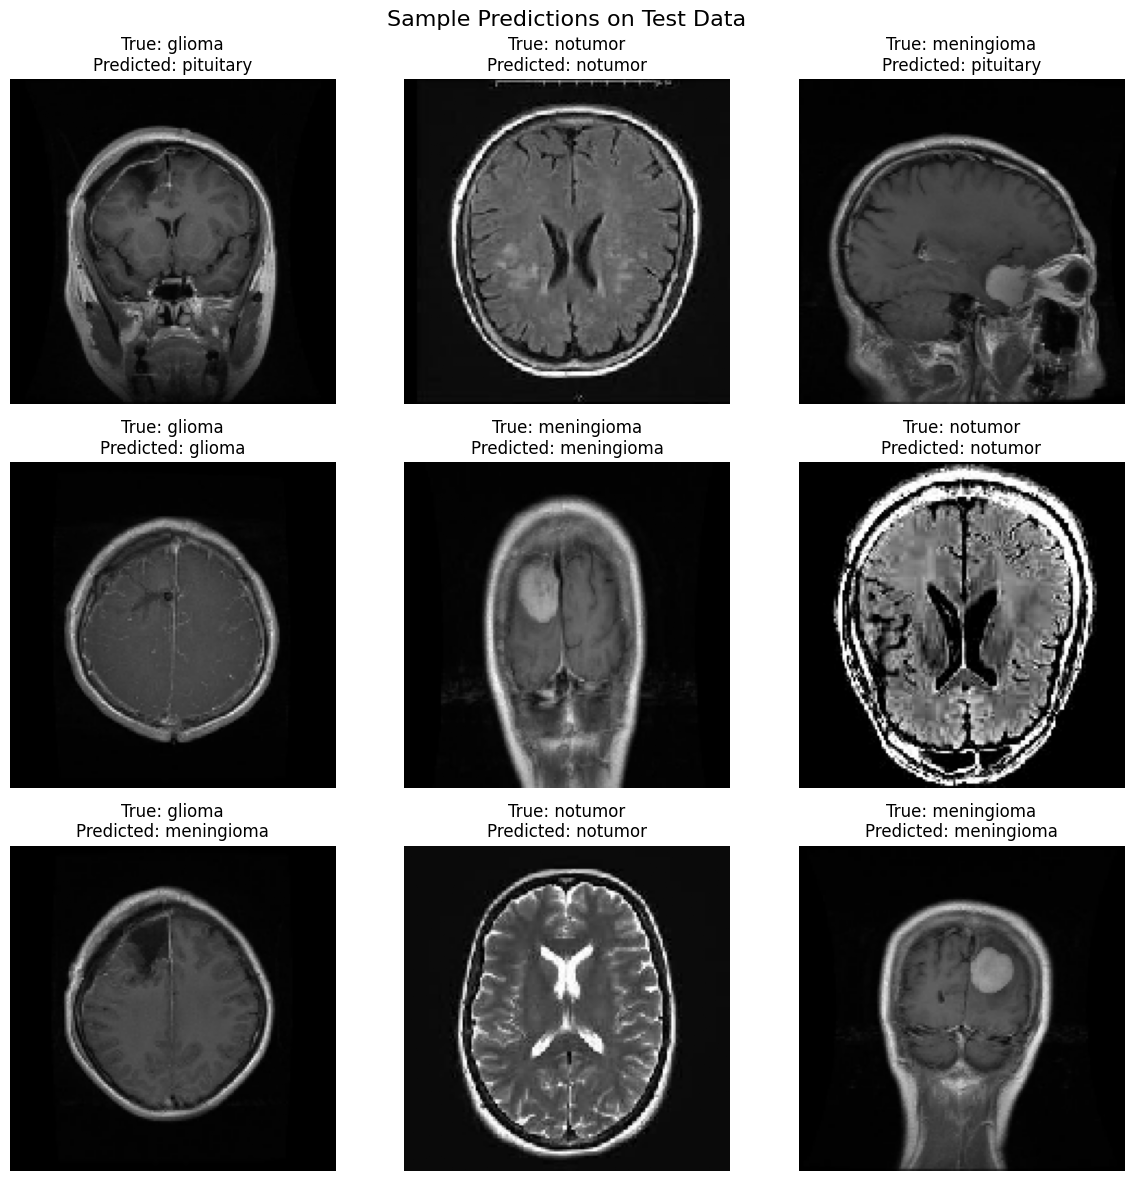

In [34]:
# Load the model
loaded_model = load_model('/kaggle/working/brain_tumor_multi_class_detection_model.h5')

# Select a few sample images from the test set
num_samples = 9  # Number of samples to visualize
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions
predictions = loaded_model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

# Plot the sample images with predicted and true labels
plt.figure(figsize=(12, 12))
for i, (image, true_label, predicted_label) in enumerate(zip(sample_images, true_classes, predicted_classes)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f'True: {categories[true_label]}\nPredicted: {categories[predicted_label]}')
    plt.axis('off')
plt.suptitle('Sample Predictions on Test Data', fontsize=16)
plt.tight_layout()
plt.show()